In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [11]:
data_path = 'excel\extract\data_imput\data_label.xlsx'
save_path = './excel/extract/data_imput/data_1.xlsx'

data_origin = pd.read_excel(data_path)
data = data_origin.iloc[:,1:]
data.head()

,纹饰,类型,颜色,表面风化
0,1,1,1.0,1
1,2,2,2.0,2
2,2,1,1.0,1
3,2,1,1.0,1
4,2,1,1.0,1


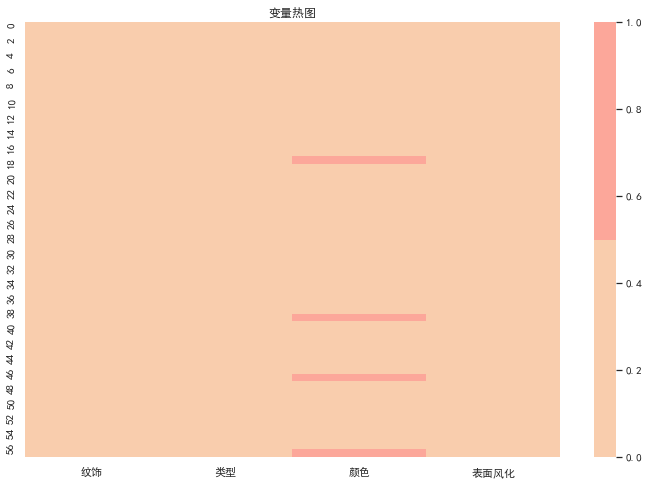

In [12]:
### 绘制缺失变量的热图
def miss_heatamp(data,title):
    cols = data.columns
    colours = ['#f9cdad', '#fca79a']  ## 第一项没缺失的颜色，第二项，缺失的颜色

    plt.figure(figsize=(12,8 ))
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    # plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=1)
    f = sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
    f.set_title(title)
    plt.savefig('1.png')

miss_heatamp(data,'变量热图')

    miss_num
颜色         4


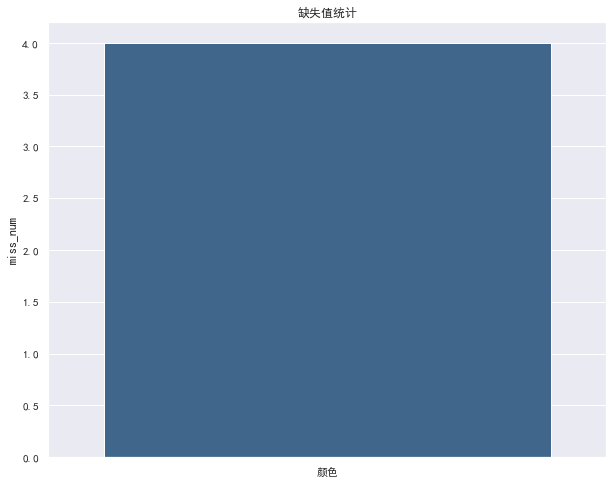

In [13]:
##### 绘制缺失变量的直方图
def miss_bar(data,title):
    '''
    data : dataframe格式的数据，行为数据，列为特征 
    title : 图表名字
    '''
    missValue2miss_num={}
    for col in data.columns:
        missing = data[col].isnull()
        num_missing = np.sum(missing)
        if num_missing > 0:  
            missValue2miss_num[col] = num_missing
    df = pd.DataFrame([missValue2miss_num])
    df.index=['miss_num']
    df = df.T
    print(df)
    
    plt.figure(figsize=(10,8 ))
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=1)

    f = sns.barplot(x=df.index,y=df['miss_num'],color='#336699')
    f.set_title(title)


miss_bar(data,'缺失值统计')

In [14]:

def rf_impute(data):
    '''
    data:dataframe格式
    '''

    copy_data = data.copy()
    miss_columns = copy_data.isnull().sum()[copy_data.isnull().sum() != 0].sort_values().index.tolist() 
    unmiss_columns = copy_data.isnull().sum()[copy_data.isnull().sum() == 0].sort_values().index.tolist() 
    for col in miss_columns:
        X_train = copy_data[copy_data[col].notnull()][unmiss_columns].values
        Y_train = copy_data[copy_data[col].notnull()][col].values
        X_test = copy_data[copy_data[col].isnull()][unmiss_columns][unmiss_columns].values
        rfr=RandomForestRegressor()
        rfr.fit(X_train,Y_train)
        predict_value = rfr.predict(X_test)
        copy_data.loc[(copy_data[col].isnull()),col] = predict_value
        unmiss_columns.append(col)
    return copy_data

imp_data = rf_impute(data)
imp_data.to_excel(save_path)
imp_data

,纹饰,类型,颜色,表面风化
0,1,1,1.000000,1
1,2,2,2.000000,2
2,2,1,1.000000,1
3,2,1,1.000000,1
4,2,1,1.000000,1
5,2,1,1.000000,1
6,3,1,1.000000,2
7,1,2,3.000000,2
8,3,1,1.000000,2
9,3,1,1.000000,2
